In [25]:
import pandas_datareader.data as pdr
import seaborn as sns
from datetime import datetime
from sqlalchemy import create_engine
import json

In [26]:
#Carregando dados da AWS do arquivo json
with open("aws_mysql_key.json") as aws_keys:
    keys = json.load(aws_keys)
    username = keys['user']
    password = keys['password']
    endpoint = keys['endpoint']
    database_name = keys['databasename']

In [27]:
#Lista com os nomes das criptomoedas que serão armazenadas
crypto_names = ['BTC', 'ETH', 'LTC', 'DAI', 'ETC', 'ETP', 'NEO', 'REP', 'XLM', 'XMR', 'XVG']

In [28]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=endpoint, db=database_name, user=username, pw=password))

In [29]:
#Data final como hoje
end = datetime.today()

#Data inicial como 1 ano atras
start = datetime(end.year-1,end.month,end.day)

#escolhendo a moeda:
currency = 'USD'

#lista para armazenar os DF de cada cryptomoeda
crypto_df_list = []


In [30]:
#Armazenando os dados na lista criada anteriormente
for crypto in crypto_names:
    crypto_df_list.append(pdr.DataReader(f"{crypto}-{currency}",'yahoo',start,end))

<AxesSubplot:xlabel='Date', ylabel='Close'>

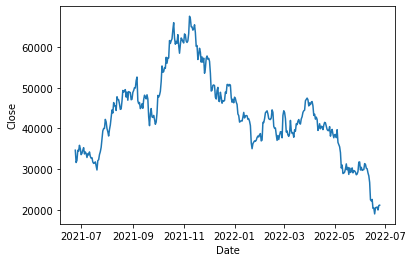

In [31]:
#Visualizando preço do bitcoin
sns.lineplot(x='Date', y='Close', data=crypto_df_list[0])

In [32]:
#Laço que vai criar tabelas na AWS com os dados
for crypto_name, crypto_df in zip(crypto_names, crypto_df_list):
    crypto_df.to_sql(crypto_name, engine, if_exists='replace')